## Emerging Technologies Project 2020
***
#### Trained Model

#### Required imports

In [1]:
# Neural networks.
import tensorflow.keras as kr
# Numerical arrays
import numpy as np
# Data frames.
import pandas as pd
# Plotting
import matplotlib.pyplot as plt

#### Set up our plot

In [2]:
# Plot style.
plt.style.use("ggplot")
# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

#### Read data and split up columns

In [3]:
# Read power data from csv file into np array, ignore the string elements [1]
data = np.genfromtxt('./misc/powerproduction.csv', delimiter=",",skip_header=1)
# Define train
train = pd.DataFrame()
# Remove rows with 0 [2]
refineddata = data[(data != 0).all(axis=1)]
# add speed and power columns to train
train['speed'] = refineddata[:,0]
train['power'] = refineddata[:,1]

In [4]:
# Show refined data
#train

#### Initialize model

In [5]:
# Create a neural network
model = kr.models.Sequential()

#### Testing with different single layer configurations

In [6]:
# Testing single layer networks

# Add a layer and compile
#model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Better than ones & zeros: random_normal - loss 230
#model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='random_normal', bias_initializer='random_normal'))

# Less acurate: glorot_uniform - 260
#model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

#### Add 3 layers to network

In [7]:
# 3 neurons, sigmoid, input 1
model.add(kr.layers.Dense(3, input_shape=(1,), activation="sigmoid", kernel_initializer='random_normal', 
                          bias_initializer='random_normal'))
# 3 neurons, sigmoid, input 3
model.add(kr.layers.Dense(3, input_shape=(3,), activation="sigmoid", kernel_initializer='random_normal', 
                          bias_initializer='random_normal'))
# 1 neurons, linear, input 3
model.add(kr.layers.Dense(1, input_shape=(3,), activation="linear", kernel_initializer='random_normal', 
                          bias_initializer='random_normal'))

#### Now compile our model

In [8]:
# Compile Network
model.compile('adam', loss='mean_squared_error') 

#### Train our model with the data read from csv file i.e. wind speed and power gen
#### Set epochs to 3k - needs an extended period to train sigmoid

In [9]:
# Train the neural network on our training data.
model.fit(train['speed'], train['power'], epochs=3000)

Epoch 1/3000
15/15 [==============================] - 1s 1ms/step - loss: 4449.6158
Epoch 2/3000
15/15 [==============================] - 0s 2ms/step - loss: 4427.6058
Epoch 3/3000
15/15 [==============================] - 0s 3ms/step - loss: 4500.3497
Epoch 4/3000
15/15 [==============================] - 0s 2ms/step - loss: 4470.1166
Epoch 5/3000
15/15 [==============================] - 0s 2ms/step - loss: 4353.3124
Epoch 6/3000
15/15 [==============================] - 0s 2ms/step - loss: 4385.8835
Epoch 7/3000
15/15 [==============================] - 0s 2ms/step - loss: 4438.4706
Epoch 8/3000
15/15 [==============================] - 0s 2ms/step - loss: 4270.7536
Epoch 9/3000
15/15 [==============================] - 0s 2ms/step - loss: 4649.5061
Epoch 10/3000
15/15 [==============================] - 0s 2ms/step - loss: 4742.3893
Epoch 11/3000
15/15 [==============================] - 0s 2ms/step - loss: 4521.2548
Epoch 12/3000
15/15 [==============================] - 0s 2ms/step - loss:

15/15 [==============================] - 0s 2ms/step - loss: 3871.0553
Epoch 98/3000
15/15 [==============================] - 0s 1ms/step - loss: 3946.4702
Epoch 99/3000
15/15 [==============================] - 0s 2ms/step - loss: 3941.6227
Epoch 100/3000
15/15 [==============================] - 0s 3ms/step - loss: 3878.1441
Epoch 101/3000
15/15 [==============================] - 0s 2ms/step - loss: 3869.9095
Epoch 102/3000
15/15 [==============================] - 0s 2ms/step - loss: 3830.7360
Epoch 103/3000
15/15 [==============================] - 0s 2ms/step - loss: 3968.8270
Epoch 104/3000
15/15 [==============================] - 0s 2ms/step - loss: 3693.0461
Epoch 105/3000
15/15 [==============================] - 0s 2ms/step - loss: 3763.8974
Epoch 106/3000
15/15 [==============================] - 0s 2ms/step - loss: 4024.2632
Epoch 107/3000
15/15 [==============================] - 0s 2ms/step - loss: 4120.5352
Epoch 108/3000
15/15 [==============================] - 0s 2ms/step - l

15/15 [==============================] - 0s 2ms/step - loss: 3328.9957
Epoch 193/3000
15/15 [==============================] - 0s 2ms/step - loss: 3207.7215
Epoch 194/3000
15/15 [==============================] - 0s 2ms/step - loss: 3327.6446
Epoch 195/3000
15/15 [==============================] - 0s 2ms/step - loss: 3283.4246
Epoch 196/3000
15/15 [==============================] - 0s 2ms/step - loss: 3090.8246
Epoch 197/3000
15/15 [==============================] - 0s 1ms/step - loss: 3294.3767
Epoch 198/3000
15/15 [==============================] - 0s 1ms/step - loss: 3352.2838
Epoch 199/3000
15/15 [==============================] - 0s 2ms/step - loss: 3267.7025
Epoch 200/3000
15/15 [==============================] - 0s 2ms/step - loss: 3258.6165
Epoch 201/3000
15/15 [==============================] - 0s 2ms/step - loss: 3110.7227
Epoch 202/3000
15/15 [==============================] - 0s 2ms/step - loss: 3207.5244
Epoch 203/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 2919.6303
Epoch 288/3000
15/15 [==============================] - 0s 2ms/step - loss: 3026.0639
Epoch 289/3000
15/15 [==============================] - 0s 1ms/step - loss: 2986.4698
Epoch 290/3000
15/15 [==============================] - 0s 1ms/step - loss: 2776.4637
Epoch 291/3000
15/15 [==============================] - 0s 2ms/step - loss: 2923.2446
Epoch 292/3000
15/15 [==============================] - 0s 2ms/step - loss: 3067.9233
Epoch 293/3000
15/15 [==============================] - 0s 1ms/step - loss: 3004.7393
Epoch 294/3000
15/15 [==============================] - 0s 2ms/step - loss: 3001.6765
Epoch 295/3000
15/15 [==============================] - 0s 2ms/step - loss: 2995.2721
Epoch 296/3000
15/15 [==============================] - 0s 2ms/step - loss: 2790.3695
Epoch 297/3000
15/15 [==============================] - 0s 2ms/step - loss: 2749.7166
Epoch 298/3000
15/15 [==============================] - 0s 1ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 2746.4427
Epoch 383/3000
15/15 [==============================] - 0s 2ms/step - loss: 2462.1840
Epoch 384/3000
15/15 [==============================] - 0s 2ms/step - loss: 2487.0711
Epoch 385/3000
15/15 [==============================] - 0s 1ms/step - loss: 2643.2108
Epoch 386/3000
15/15 [==============================] - 0s 2ms/step - loss: 2460.3943
Epoch 387/3000
15/15 [==============================] - 0s 1ms/step - loss: 2454.5455
Epoch 388/3000
15/15 [==============================] - 0s 2ms/step - loss: 2348.0968
Epoch 389/3000
15/15 [==============================] - 0s 2ms/step - loss: 2510.0285
Epoch 390/3000
15/15 [==============================] - 0s 2ms/step - loss: 2660.0989
Epoch 391/3000
15/15 [==============================] - 0s 2ms/step - loss: 2484.5853
Epoch 392/3000
15/15 [==============================] - 0s 2ms/step - loss: 2502.4919
Epoch 393/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 1ms/step - loss: 2211.8344
Epoch 478/3000
15/15 [==============================] - 0s 2ms/step - loss: 2285.5139
Epoch 479/3000
15/15 [==============================] - 0s 2ms/step - loss: 2161.2396
Epoch 480/3000
15/15 [==============================] - 0s 2ms/step - loss: 2087.1377
Epoch 481/3000
15/15 [==============================] - 0s 2ms/step - loss: 2152.1529
Epoch 482/3000
15/15 [==============================] - 0s 2ms/step - loss: 2115.7709
Epoch 483/3000
15/15 [==============================] - 0s 3ms/step - loss: 2197.6739
Epoch 484/3000
15/15 [==============================] - 0s 2ms/step - loss: 2262.3103
Epoch 485/3000
15/15 [==============================] - 0s 1ms/step - loss: 2246.2626
Epoch 486/3000
15/15 [==============================] - 0s 1ms/step - loss: 2192.4183
Epoch 487/3000
15/15 [==============================] - 0s 2ms/step - loss: 2266.7884
Epoch 488/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 1784.0040
Epoch 573/3000
15/15 [==============================] - 0s 2ms/step - loss: 1754.9058
Epoch 574/3000
15/15 [==============================] - 0s 1ms/step - loss: 1937.8511
Epoch 575/3000
15/15 [==============================] - 0s 2ms/step - loss: 1753.0846
Epoch 576/3000
15/15 [==============================] - 0s 2ms/step - loss: 1758.6579
Epoch 577/3000
15/15 [==============================] - 0s 1ms/step - loss: 1862.2034
Epoch 578/3000
15/15 [==============================] - 0s 1ms/step - loss: 1742.9200
Epoch 579/3000
15/15 [==============================] - 0s 2ms/step - loss: 1855.4203
Epoch 580/3000
15/15 [==============================] - 0s 1ms/step - loss: 1928.8718
Epoch 581/3000
15/15 [==============================] - 0s 2ms/step - loss: 1680.3799
Epoch 582/3000
15/15 [==============================] - 0s 2ms/step - loss: 1675.4277
Epoch 583/3000
15/15 [==============================] - 0s 1ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 1568.8326
Epoch 668/3000
15/15 [==============================] - 0s 2ms/step - loss: 1445.8286
Epoch 669/3000
15/15 [==============================] - 0s 2ms/step - loss: 1663.4192
Epoch 670/3000
15/15 [==============================] - 0s 2ms/step - loss: 1568.1290
Epoch 671/3000
15/15 [==============================] - 0s 2ms/step - loss: 1479.2662
Epoch 672/3000
15/15 [==============================] - 0s 2ms/step - loss: 1576.9180
Epoch 673/3000
15/15 [==============================] - 0s 2ms/step - loss: 1605.5537
Epoch 674/3000
15/15 [==============================] - 0s 2ms/step - loss: 1588.3622
Epoch 675/3000
15/15 [==============================] - 0s 2ms/step - loss: 1560.7498
Epoch 676/3000
15/15 [==============================] - 0s 2ms/step - loss: 1451.9595
Epoch 677/3000
15/15 [==============================] - 0s 2ms/step - loss: 1392.2453
Epoch 678/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 1311.8372
Epoch 763/3000
15/15 [==============================] - 0s 1ms/step - loss: 1184.9990
Epoch 764/3000
15/15 [==============================] - 0s 2ms/step - loss: 1384.7179
Epoch 765/3000
15/15 [==============================] - 0s 1ms/step - loss: 1241.6830
Epoch 766/3000
15/15 [==============================] - 0s 2ms/step - loss: 1206.0128
Epoch 767/3000
15/15 [==============================] - 0s 2ms/step - loss: 1268.8991
Epoch 768/3000
15/15 [==============================] - 0s 1ms/step - loss: 1226.2831
Epoch 769/3000
15/15 [==============================] - 0s 2ms/step - loss: 1182.9304
Epoch 770/3000
15/15 [==============================] - 0s 2ms/step - loss: 1230.3161
Epoch 771/3000
15/15 [==============================] - 0s 2ms/step - loss: 1296.6037
Epoch 772/3000
15/15 [==============================] - 0s 2ms/step - loss: 1273.1897
Epoch 773/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 1018.9813
Epoch 858/3000
15/15 [==============================] - 0s 2ms/step - loss: 1105.5771
Epoch 859/3000
15/15 [==============================] - 0s 2ms/step - loss: 1014.4926
Epoch 860/3000
15/15 [==============================] - 0s 2ms/step - loss: 1019.9390
Epoch 861/3000
15/15 [==============================] - 0s 1ms/step - loss: 977.5181
Epoch 862/3000
15/15 [==============================] - 0s 2ms/step - loss: 1005.4262
Epoch 863/3000
15/15 [==============================] - 0s 2ms/step - loss: 1059.2618
Epoch 864/3000
15/15 [==============================] - 0s 2ms/step - loss: 1025.4045
Epoch 865/3000
15/15 [==============================] - 0s 2ms/step - loss: 976.5733
Epoch 866/3000
15/15 [==============================] - 0s 2ms/step - loss: 1014.6207
Epoch 867/3000
15/15 [==============================] - 0s 2ms/step - loss: 970.8713
Epoch 868/3000
15/15 [==============================] - 0s 2ms/step - lo

15/15 [==============================] - 0s 2ms/step - loss: 893.8798
Epoch 954/3000
15/15 [==============================] - 0s 3ms/step - loss: 824.6173
Epoch 955/3000
15/15 [==============================] - 0s 2ms/step - loss: 898.9496
Epoch 956/3000
15/15 [==============================] - 0s 2ms/step - loss: 805.3392
Epoch 957/3000
15/15 [==============================] - 0s 2ms/step - loss: 779.9701
Epoch 958/3000
15/15 [==============================] - 0s 2ms/step - loss: 819.3525
Epoch 959/3000
15/15 [==============================] - 0s 1ms/step - loss: 835.5684
Epoch 960/3000
15/15 [==============================] - 0s 2ms/step - loss: 772.8918
Epoch 961/3000
15/15 [==============================] - 0s 2ms/step - loss: 797.8042
Epoch 962/3000
15/15 [==============================] - 0s 1ms/step - loss: 768.2913
Epoch 963/3000
15/15 [==============================] - 0s 2ms/step - loss: 739.1724
Epoch 964/3000
15/15 [==============================] - 0s 2ms/step - loss: 855.

Epoch 1049/3000
15/15 [==============================] - 0s 2ms/step - loss: 657.6203
Epoch 1050/3000
15/15 [==============================] - 0s 2ms/step - loss: 672.8023
Epoch 1051/3000
15/15 [==============================] - 0s 1ms/step - loss: 648.9724
Epoch 1052/3000
15/15 [==============================] - 0s 2ms/step - loss: 682.7644
Epoch 1053/3000
15/15 [==============================] - 0s 1ms/step - loss: 657.5533
Epoch 1054/3000
15/15 [==============================] - 0s 2ms/step - loss: 661.4483
Epoch 1055/3000
15/15 [==============================] - 0s 1ms/step - loss: 663.5308
Epoch 1056/3000
15/15 [==============================] - 0s 2ms/step - loss: 630.1018
Epoch 1057/3000
15/15 [==============================] - 0s 2ms/step - loss: 659.5145
Epoch 1058/3000
15/15 [==============================] - 0s 2ms/step - loss: 638.8556
Epoch 1059/3000
15/15 [==============================] - 0s 2ms/step - loss: 652.9265
Epoch 1060/3000
15/15 [==============================]

Epoch 1144/3000
15/15 [==============================] - 0s 2ms/step - loss: 492.5826
Epoch 1145/3000
15/15 [==============================] - 0s 2ms/step - loss: 522.3524
Epoch 1146/3000
15/15 [==============================] - 0s 1ms/step - loss: 515.5920
Epoch 1147/3000
15/15 [==============================] - 0s 1ms/step - loss: 503.7997
Epoch 1148/3000
15/15 [==============================] - 0s 2ms/step - loss: 498.8964
Epoch 1149/3000
15/15 [==============================] - 0s 1ms/step - loss: 509.7291
Epoch 1150/3000
15/15 [==============================] - 0s 2ms/step - loss: 537.3824
Epoch 1151/3000
15/15 [==============================] - 0s 2ms/step - loss: 526.0305
Epoch 1152/3000
15/15 [==============================] - 0s 2ms/step - loss: 509.5977
Epoch 1153/3000
15/15 [==============================] - 0s 2ms/step - loss: 504.8660
Epoch 1154/3000
15/15 [==============================] - 0s 2ms/step - loss: 514.7496
Epoch 1155/3000
15/15 [==============================]

15/15 [==============================] - 0s 2ms/step - loss: 404.4883
Epoch 1240/3000
15/15 [==============================] - 0s 2ms/step - loss: 399.2478
Epoch 1241/3000
15/15 [==============================] - 0s 2ms/step - loss: 402.7839
Epoch 1242/3000
15/15 [==============================] - 0s 2ms/step - loss: 392.5211
Epoch 1243/3000
15/15 [==============================] - 0s 3ms/step - loss: 406.4594
Epoch 1244/3000
15/15 [==============================] - 0s 2ms/step - loss: 394.9102
Epoch 1245/3000
15/15 [==============================] - 0s 2ms/step - loss: 408.5481
Epoch 1246/3000
15/15 [==============================] - 0s 2ms/step - loss: 400.0244
Epoch 1247/3000
15/15 [==============================] - 0s 2ms/step - loss: 372.0523
Epoch 1248/3000
15/15 [==============================] - 0s 1ms/step - loss: 388.7167
Epoch 1249/3000
15/15 [==============================] - 0s 1ms/step - loss: 397.5053
Epoch 1250/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 301.0189
Epoch 1335/3000
15/15 [==============================] - 0s 1ms/step - loss: 332.5850
Epoch 1336/3000
15/15 [==============================] - 0s 2ms/step - loss: 301.5704
Epoch 1337/3000
15/15 [==============================] - 0s 2ms/step - loss: 312.4088
Epoch 1338/3000
15/15 [==============================] - 0s 2ms/step - loss: 295.8665
Epoch 1339/3000
15/15 [==============================] - 0s 2ms/step - loss: 320.8341
Epoch 1340/3000
15/15 [==============================] - 0s 2ms/step - loss: 318.7982
Epoch 1341/3000
15/15 [==============================] - 0s 2ms/step - loss: 303.3429
Epoch 1342/3000
15/15 [==============================] - 0s 1ms/step - loss: 303.1649
Epoch 1343/3000
15/15 [==============================] - 0s 2ms/step - loss: 274.7797
Epoch 1344/3000
15/15 [==============================] - 0s 2ms/step - loss: 285.2890
Epoch 1345/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 242.8696
Epoch 1430/3000
15/15 [==============================] - 0s 2ms/step - loss: 228.0187
Epoch 1431/3000
15/15 [==============================] - 0s 1ms/step - loss: 213.0596
Epoch 1432/3000
15/15 [==============================] - 0s 2ms/step - loss: 232.9739
Epoch 1433/3000
15/15 [==============================] - 0s 2ms/step - loss: 241.9814
Epoch 1434/3000
15/15 [==============================] - 0s 1ms/step - loss: 241.8794
Epoch 1435/3000
15/15 [==============================] - 0s 2ms/step - loss: 232.6172
Epoch 1436/3000
15/15 [==============================] - 0s 2ms/step - loss: 234.0012
Epoch 1437/3000
15/15 [==============================] - 0s 3ms/step - loss: 219.9249
Epoch 1438/3000
15/15 [==============================] - 0s 2ms/step - loss: 238.7586
Epoch 1439/3000
15/15 [==============================] - 0s 2ms/step - loss: 216.9967
Epoch 1440/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 194.6984
Epoch 1525/3000
15/15 [==============================] - 0s 2ms/step - loss: 188.9090
Epoch 1526/3000
15/15 [==============================] - 0s 2ms/step - loss: 184.0464
Epoch 1527/3000
15/15 [==============================] - 0s 2ms/step - loss: 182.8273
Epoch 1528/3000
15/15 [==============================] - 0s 2ms/step - loss: 174.7389
Epoch 1529/3000
15/15 [==============================] - 0s 2ms/step - loss: 182.1299
Epoch 1530/3000
15/15 [==============================] - 0s 3ms/step - loss: 182.0224
Epoch 1531/3000
15/15 [==============================] - 0s 2ms/step - loss: 184.1340
Epoch 1532/3000
15/15 [==============================] - 0s 3ms/step - loss: 177.2485
Epoch 1533/3000
15/15 [==============================] - 0s 2ms/step - loss: 174.3090
Epoch 1534/3000
15/15 [==============================] - 0s 2ms/step - loss: 181.7428
Epoch 1535/3000
15/15 [==============================] - 0s 2ms/step -

Epoch 1619/3000
15/15 [==============================] - 0s 2ms/step - loss: 141.4992
Epoch 1620/3000
15/15 [==============================] - 0s 2ms/step - loss: 146.4649
Epoch 1621/3000
15/15 [==============================] - 0s 2ms/step - loss: 146.9634
Epoch 1622/3000
15/15 [==============================] - 0s 2ms/step - loss: 143.1465
Epoch 1623/3000
15/15 [==============================] - 0s 2ms/step - loss: 153.6346
Epoch 1624/3000
15/15 [==============================] - 0s 2ms/step - loss: 143.1958
Epoch 1625/3000
15/15 [==============================] - 0s 2ms/step - loss: 145.7620
Epoch 1626/3000
15/15 [==============================] - 0s 2ms/step - loss: 149.2119
Epoch 1627/3000
15/15 [==============================] - 0s 1ms/step - loss: 152.2725
Epoch 1628/3000
15/15 [==============================] - 0s 1ms/step - loss: 146.6841
Epoch 1629/3000
15/15 [==============================] - 0s 2ms/step - loss: 149.4493
Epoch 1630/3000
15/15 [==============================]

Epoch 1714/3000
15/15 [==============================] - 0s 2ms/step - loss: 115.3090
Epoch 1715/3000
15/15 [==============================] - 0s 2ms/step - loss: 126.2281
Epoch 1716/3000
15/15 [==============================] - 0s 2ms/step - loss: 121.5019
Epoch 1717/3000
15/15 [==============================] - 0s 2ms/step - loss: 115.0043
Epoch 1718/3000
15/15 [==============================] - 0s 2ms/step - loss: 115.5934
Epoch 1719/3000
15/15 [==============================] - 0s 2ms/step - loss: 117.1197
Epoch 1720/3000
15/15 [==============================] - 0s 2ms/step - loss: 118.1129
Epoch 1721/3000
15/15 [==============================] - 0s 2ms/step - loss: 114.2495
Epoch 1722/3000
15/15 [==============================] - 0s 2ms/step - loss: 123.7154
Epoch 1723/3000
15/15 [==============================] - 0s 2ms/step - loss: 119.3506
Epoch 1724/3000
15/15 [==============================] - 0s 2ms/step - loss: 125.3195
Epoch 1725/3000
15/15 [==============================]

15/15 [==============================] - 0s 2ms/step - loss: 101.0577
Epoch 1810/3000
15/15 [==============================] - 0s 2ms/step - loss: 99.8063
Epoch 1811/3000
15/15 [==============================] - 0s 2ms/step - loss: 100.0491
Epoch 1812/3000
15/15 [==============================] - 0s 2ms/step - loss: 93.5364
Epoch 1813/3000
15/15 [==============================] - 0s 2ms/step - loss: 97.3061
Epoch 1814/3000
15/15 [==============================] - 0s 2ms/step - loss: 95.5459
Epoch 1815/3000
15/15 [==============================] - 0s 1ms/step - loss: 92.1220
Epoch 1816/3000
15/15 [==============================] - 0s 2ms/step - loss: 101.0122
Epoch 1817/3000
15/15 [==============================] - 0s 2ms/step - loss: 95.0053
Epoch 1818/3000
15/15 [==============================] - 0s 1ms/step - loss: 91.9220
Epoch 1819/3000
15/15 [==============================] - 0s 1ms/step - loss: 93.0156
Epoch 1820/3000
15/15 [==============================] - 0s 2ms/step - loss: 9

15/15 [==============================] - 0s 2ms/step - loss: 84.8961
Epoch 1905/3000
15/15 [==============================] - 0s 2ms/step - loss: 79.3974
Epoch 1906/3000
15/15 [==============================] - 0s 3ms/step - loss: 85.1284
Epoch 1907/3000
15/15 [==============================] - 0s 2ms/step - loss: 75.0495
Epoch 1908/3000
15/15 [==============================] - 0s 2ms/step - loss: 80.5937
Epoch 1909/3000
15/15 [==============================] - 0s 2ms/step - loss: 82.1949
Epoch 1910/3000
15/15 [==============================] - 0s 2ms/step - loss: 78.6676
Epoch 1911/3000
15/15 [==============================] - 0s 2ms/step - loss: 79.4077
Epoch 1912/3000
15/15 [==============================] - 0s 2ms/step - loss: 79.1097
Epoch 1913/3000
15/15 [==============================] - 0s 2ms/step - loss: 77.8838
Epoch 1914/3000
15/15 [==============================] - 0s 2ms/step - loss: 75.6380
Epoch 1915/3000
15/15 [==============================] - 0s 1ms/step - loss: 79.4

15/15 [==============================] - 0s 2ms/step - loss: 65.4834
Epoch 2001/3000
15/15 [==============================] - 0s 2ms/step - loss: 64.6463
Epoch 2002/3000
15/15 [==============================] - 0s 2ms/step - loss: 65.3527
Epoch 2003/3000
15/15 [==============================] - 0s 2ms/step - loss: 69.0885
Epoch 2004/3000
15/15 [==============================] - 0s 2ms/step - loss: 60.7030
Epoch 2005/3000
15/15 [==============================] - 0s 1ms/step - loss: 66.7138
Epoch 2006/3000
15/15 [==============================] - 0s 1ms/step - loss: 65.2402
Epoch 2007/3000
15/15 [==============================] - 0s 1ms/step - loss: 64.7150
Epoch 2008/3000
15/15 [==============================] - 0s 1ms/step - loss: 64.8491
Epoch 2009/3000
15/15 [==============================] - 0s 2ms/step - loss: 60.1751
Epoch 2010/3000
15/15 [==============================] - 0s 2ms/step - loss: 63.9467
Epoch 2011/3000
15/15 [==============================] - 0s 2ms/step - loss: 61.1

15/15 [==============================] - 0s 2ms/step - loss: 57.7146
Epoch 2097/3000
15/15 [==============================] - 0s 2ms/step - loss: 52.5280
Epoch 2098/3000
15/15 [==============================] - 0s 1ms/step - loss: 51.8629
Epoch 2099/3000
15/15 [==============================] - 0s 2ms/step - loss: 50.6427
Epoch 2100/3000
15/15 [==============================] - ETA: 0s - loss: 42.34 - 0s 2ms/step - loss: 51.9932
Epoch 2101/3000
15/15 [==============================] - 0s 2ms/step - loss: 50.2923
Epoch 2102/3000
15/15 [==============================] - ETA: 0s - loss: 56.50 - 0s 2ms/step - loss: 52.1975
Epoch 2103/3000
15/15 [==============================] - 0s 1ms/step - loss: 52.8105
Epoch 2104/3000
15/15 [==============================] - 0s 2ms/step - loss: 51.3081
Epoch 2105/3000
15/15 [==============================] - 0s 2ms/step - loss: 45.8138
Epoch 2106/3000
15/15 [==============================] - 0s 2ms/step - loss: 53.8833
Epoch 2107/3000
15/15 [==========

15/15 [==============================] - 0s 2ms/step - loss: 45.3084
Epoch 2193/3000
15/15 [==============================] - 0s 1ms/step - loss: 45.9758
Epoch 2194/3000
15/15 [==============================] - 0s 2ms/step - loss: 42.8422
Epoch 2195/3000
15/15 [==============================] - 0s 2ms/step - loss: 42.1325
Epoch 2196/3000
15/15 [==============================] - 0s 2ms/step - loss: 42.7878
Epoch 2197/3000
15/15 [==============================] - 0s 2ms/step - loss: 41.5679
Epoch 2198/3000
15/15 [==============================] - 0s 2ms/step - loss: 43.7464
Epoch 2199/3000
15/15 [==============================] - 0s 2ms/step - loss: 42.0494
Epoch 2200/3000
15/15 [==============================] - 0s 2ms/step - loss: 47.0710
Epoch 2201/3000
15/15 [==============================] - 0s 2ms/step - loss: 46.8438
Epoch 2202/3000
15/15 [==============================] - 0s 1ms/step - loss: 43.4605
Epoch 2203/3000
15/15 [==============================] - 0s 1ms/step - loss: 45.2

15/15 [==============================] - 0s 2ms/step - loss: 35.6944
Epoch 2289/3000
15/15 [==============================] - 0s 2ms/step - loss: 37.3444
Epoch 2290/3000
15/15 [==============================] - 0s 1ms/step - loss: 36.2048
Epoch 2291/3000
15/15 [==============================] - 0s 2ms/step - loss: 36.7614
Epoch 2292/3000
15/15 [==============================] - 0s 2ms/step - loss: 36.5248
Epoch 2293/3000
15/15 [==============================] - 0s 2ms/step - loss: 35.5382
Epoch 2294/3000
15/15 [==============================] - 0s 1ms/step - loss: 36.5434
Epoch 2295/3000
15/15 [==============================] - 0s 2ms/step - loss: 37.9299
Epoch 2296/3000
15/15 [==============================] - 0s 2ms/step - loss: 37.1036
Epoch 2297/3000
15/15 [==============================] - 0s 2ms/step - loss: 33.5994
Epoch 2298/3000
15/15 [==============================] - 0s 2ms/step - loss: 36.4710
Epoch 2299/3000
15/15 [==============================] - 0s 2ms/step - loss: 37.4

15/15 [==============================] - 0s 2ms/step - loss: 30.5479
Epoch 2385/3000
15/15 [==============================] - 0s 2ms/step - loss: 29.5954
Epoch 2386/3000
15/15 [==============================] - 0s 2ms/step - loss: 32.3473
Epoch 2387/3000
15/15 [==============================] - 0s 1ms/step - loss: 29.7882
Epoch 2388/3000
15/15 [==============================] - 0s 2ms/step - loss: 31.9542
Epoch 2389/3000
15/15 [==============================] - 0s 2ms/step - loss: 32.5319
Epoch 2390/3000
15/15 [==============================] - 0s 1ms/step - loss: 31.3621
Epoch 2391/3000
15/15 [==============================] - 0s 2ms/step - loss: 29.8306
Epoch 2392/3000
15/15 [==============================] - 0s 2ms/step - loss: 29.4911
Epoch 2393/3000
15/15 [==============================] - 0s 2ms/step - loss: 29.8886
Epoch 2394/3000
15/15 [==============================] - 0s 2ms/step - loss: 30.2210
Epoch 2395/3000
15/15 [==============================] - 0s 2ms/step - loss: 32.2

15/15 [==============================] - 0s 1ms/step - loss: 26.0533
Epoch 2481/3000
15/15 [==============================] - 0s 1ms/step - loss: 28.4340
Epoch 2482/3000
15/15 [==============================] - 0s 2ms/step - loss: 27.6460
Epoch 2483/3000
15/15 [==============================] - 0s 2ms/step - loss: 26.2000
Epoch 2484/3000
15/15 [==============================] - 0s 2ms/step - loss: 26.1349
Epoch 2485/3000
15/15 [==============================] - 0s 1ms/step - loss: 26.3408
Epoch 2486/3000
15/15 [==============================] - 0s 2ms/step - loss: 26.4065
Epoch 2487/3000
15/15 [==============================] - 0s 2ms/step - loss: 26.6429
Epoch 2488/3000
15/15 [==============================] - 0s 2ms/step - loss: 28.1236
Epoch 2489/3000
15/15 [==============================] - 0s 1ms/step - loss: 26.4456
Epoch 2490/3000
15/15 [==============================] - 0s 2ms/step - loss: 26.8148
Epoch 2491/3000
15/15 [==============================] - 0s 2ms/step - loss: 26.8

15/15 [==============================] - 0s 1ms/step - loss: 26.2875
Epoch 2577/3000
15/15 [==============================] - 0s 1ms/step - loss: 23.0955
Epoch 2578/3000
15/15 [==============================] - 0s 2ms/step - loss: 23.0531
Epoch 2579/3000
15/15 [==============================] - 0s 2ms/step - loss: 24.8062
Epoch 2580/3000
15/15 [==============================] - 0s 1ms/step - loss: 24.3959
Epoch 2581/3000
15/15 [==============================] - 0s 2ms/step - loss: 22.1671
Epoch 2582/3000
15/15 [==============================] - 0s 1ms/step - loss: 24.6397
Epoch 2583/3000
15/15 [==============================] - 0s 2ms/step - loss: 24.9956
Epoch 2584/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.9145
Epoch 2585/3000
15/15 [==============================] - 0s 2ms/step - loss: 23.7505
Epoch 2586/3000
15/15 [==============================] - 0s 2ms/step - loss: 23.3359
Epoch 2587/3000
15/15 [==============================] - 0s 2ms/step - loss: 23.5

15/15 [==============================] - 0s 2ms/step - loss: 20.9728
Epoch 2673/3000
15/15 [==============================] - 0s 1ms/step - loss: 21.5424
Epoch 2674/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.0583
Epoch 2675/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.6205
Epoch 2676/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.0569
Epoch 2677/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.5258
Epoch 2678/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.3986
Epoch 2679/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.3929
Epoch 2680/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.1095
Epoch 2681/3000
15/15 [==============================] - 0s 2ms/step - loss: 22.7901
Epoch 2682/3000
15/15 [==============================] - 0s 1ms/step - loss: 19.8030
Epoch 2683/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.7

15/15 [==============================] - 0s 2ms/step - loss: 18.6382
Epoch 2769/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.3562
Epoch 2770/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.1092
Epoch 2771/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.6508
Epoch 2772/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.6501
Epoch 2773/3000
15/15 [==============================] - 0s 2ms/step - loss: 17.9926
Epoch 2774/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.4398
Epoch 2775/3000
15/15 [==============================] - 0s 1ms/step - loss: 19.2586
Epoch 2776/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.6644
Epoch 2777/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.5295
Epoch 2778/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.7710
Epoch 2779/3000
15/15 [==============================] - 0s 1ms/step - loss: 20.7

15/15 [==============================] - 0s 2ms/step - loss: 17.6503
Epoch 2865/3000
15/15 [==============================] - 0s 2ms/step - loss: 17.9982
Epoch 2866/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.0039
Epoch 2867/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.5674
Epoch 2868/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.9889
Epoch 2869/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.7196
Epoch 2870/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.1294
Epoch 2871/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.6370
Epoch 2872/3000
15/15 [==============================] - 0s 3ms/step - loss: 20.6488
Epoch 2873/3000
15/15 [==============================] - 0s 3ms/step - loss: 19.5213
Epoch 2874/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.6681
Epoch 2875/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.8

15/15 [==============================] - 0s 2ms/step - loss: 18.4124
Epoch 2961/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.8006
Epoch 2962/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.8585
Epoch 2963/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.3339
Epoch 2964/3000
15/15 [==============================] - 0s 1ms/step - loss: 16.0231
Epoch 2965/3000
15/15 [==============================] - 0s 2ms/step - loss: 16.4356
Epoch 2966/3000
15/15 [==============================] - 0s 1ms/step - loss: 17.9756
Epoch 2967/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.6485
Epoch 2968/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.8379
Epoch 2969/3000
15/15 [==============================] - 0s 2ms/step - loss: 17.3980
Epoch 2970/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.5385
Epoch 2971/3000
15/15 [==============================] - 0s 2ms/step - loss: 16.8

 #### Plot graph

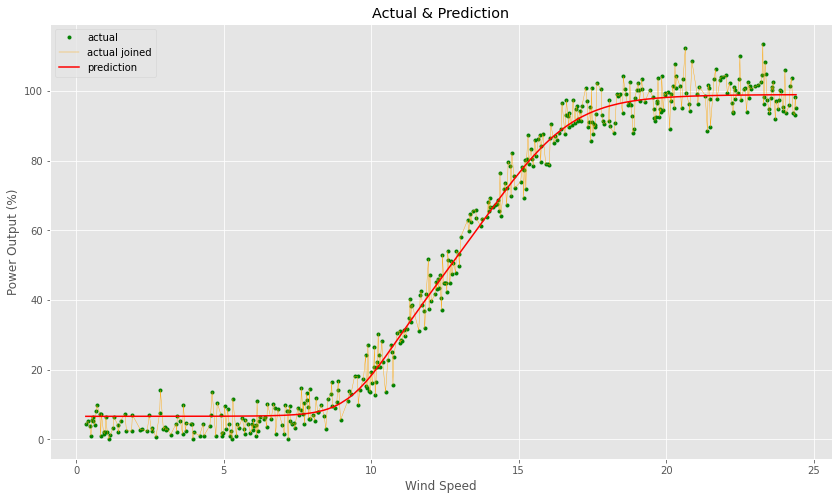

In [10]:
# Graph is easier to read when the actual data is ploted as points
# plot a graph  of power over time, 
# 1. actual data is displayed in green
# 2. predicted data is displayed in red

plt.title('Actual & Prediction')
# actual - green
plt.plot(train['speed'],train['power'], '.', color="green", label='actual')
# join the dots
plt.plot(train['speed'],train['power'], color="orange", label='actual joined', linewidth = 0.4)
# prediction - red
plt.plot(train['speed'],model.predict(train['speed']), color="red", label='prediction')
# clean up output
plt.xlabel('Wind Speed')
plt.ylabel('Power Output (%)')
plt.legend()

In [12]:
# take a random sample
model.predict([1.0, 9.0, 29.0, 70.0])

array([[ 6.581505],
       [10.529038],
       [98.95652 ],
       [98.96201 ]], dtype=float32)

In [11]:
# Save Model
model.save('model.h5')

# References

plots: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linewidth

[1] ignore rows in np array: https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

[2] remove rows with a 0: https://stackoverflow.com/questions/47819146/how-to-delete-a-row-based-on-a-condition-from-a-numpy-array


***

#### End